# Artifical Neural Network

- Yapay sinir ağı (ANN), insan beyninin çalışma şeklini taklit etmek için tasarlanmış bir yapay zeka modelidir. Bir yapay sinir ağı, birçok basit birimden oluşur ve her bir birim bir "nöron" olarak adlandırılır. Bu nöronlar, birbirleriyle bağlantılı katmanlarda düzenlenir.

Yapay sinir ağları, veri içindeki karmaşık ilişkileri öğrenmek için kullanılır. Örneğin, bir resimdeki bir nesneyi tanımak veya bir metni sınıflandırmak gibi görevlerde kullanılabilirler. Bir yapay sinir ağı, verileri girdi katmanından alır, ardından gizli katmanlardan geçirir ve son olarak çıktı katmanında bir sonuç üretir.

Yapay sinir ağlarının eğitimi, birçok örnekle yapılan tekrarlı bir süreçtir. Model, gerçek sonuçlarla karşılaştırılarak hatalarını azaltmak için ayarlanır. Bu süreçte, ağın ağırlıkları ve önyargıları gibi parametreleri güncellenir.

Yapay sinir ağlarının avantajlarından biri, karmaşık veri setlerinde iyi performans göstermeleridir. Ancak, büyük veri setleri ve karmaşık yapılar gerektirebilirler, bu da eğitim sürecinin zaman almasına neden olabilir.

Özetlemek gerekirse, yapay sinir ağları, insan beyninin işlevselliğinden ilham alarak karmaşık problemleri çözmek için kullanılan bir yapay zeka modelidir. Verileri işlerken ve öğrenirken, bu ağlar karmaşık ilişkileri öğrenir ve genellikle yüksek doğrulukla sonuçlar üretebilirler.

- Lojistik regresyon sınıflandırmada iyidir ancak karmaşıklık (doğrusal olmayanlık) arttıkça, modelin doğruluğu azalır.
- Bu nedenle, modelin karmaşıklığını artırmamız gerekiyor.
- Modelin karmaşıklığını artırmak için daha fazla doğrusal olmayan fonksiyonu gizli katmana eklememiz gerekiyor.
- Yapay sinir ağından beklediğimiz şey, karmaşıklık arttıkça daha fazla gizli katman kullanmak ve modelimizin daha iyi uyum sağlamasıdır. Sonuç olarak, doğruluk artar.
- **Yapay Sinir Ağı Adımları:**
    1. Kütüphaneleri İçe Aktarma
        - Size göstermek için tekrar içe aktarıyorum, ancak aslında bunları önceki bölümlerde içe aktardık.
    2. Veri Kümesini Hazırlama
        - Tamamen önceki bölümdekiyle aynıdır (lojistik regresyon).
        - Aynı veri kümesini kullandığımız için sadece train_loader ve test_loader'a ihtiyacımız var.
        - Aynı batch boyutunu, epoch ve iterasyon sayılarını kullanıyoruz.
    3. Yapay Sinir Ağı Modeli Oluşturma
        - 3 gizli katman ekliyoruz.
        - Çeşitlilik için ReLU, Tanh ve ELU aktivasyon fonksiyonlarını kullanıyoruz.
    4. Model Sınıfını Başlatma
        - input_dim = 28*28 # görüntünün piksel piksel boyutu
        - output_dim = 10  # etiketler 0,1,2,3,4,5,6,7,8,9
        - Gizli katman boyutu 150'dir. Sadece 150 olarak seçtim, bir nedeni yok. Aslında gizli katman boyutu hiperparametredir ve seçilmeli ve ayarlanmalıdır. Gizli katman boyutu için farklı değerler deneyebilir ve sonuçları gözlemleyebilirsiniz.
        - modeli oluşturma
    5. Kayıp Sınıfını Başlatma
        - Cross entropy kaybı
        - İçinde aynı zamanda softmax (lojistik fonksiyon) bulunmaktadır.
    6. Optimizasyon Algoritmasını Başlatma
        - SGD Optimizasyon Algoritması
    7. Modelin Eğitilmesi
    8. Tahmin
- Sonuç olarak, grafikten görebileceğiniz gibi, kayıp azalırken doğruluk artıyor ve modelimiz öğreniyor (eğitiliyor).
- Gizli katmanlara sayesinde model daha iyi öğrendi ve doğruluk (neredeyse %95) lojistik regresyon modelinin doğruluğundan daha iyidir.

### Kütüphanelerin import edilmesi

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Verisetinin yüklenmesi ve hazirlanmasi
Bu kısım Logistic regresyon kısmından alınmıştır açıklamalar için oraya bakabilirsiniz.

In [2]:
train = pd.read_csv(r"data/train.csv",dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [3]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [4]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [5]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


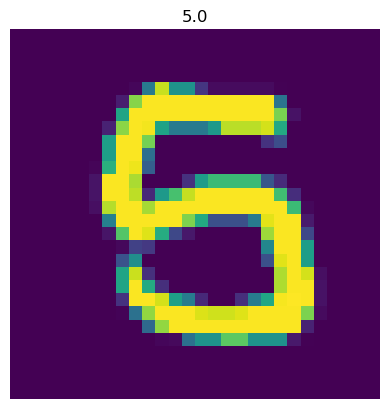

In [6]:
plt.imshow(features_numpy[51].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[51]))
plt.savefig('graph.png')
plt.show()

### Yapay sinir ağının oluşturulması

1. **Model Sınıfı Oluşturma (`class ANNModel(nn.Module)`):** Bu adımda, `ANNModel` adında bir sınıf tanımlanıyor. Bu sınıf, PyTorch'taki `nn.Module` sınıfından türetilmiştir, bu da PyTorch modeli için temel bir yapı sağlar.

2. **İnit Fonksiyonu (`def __init__(self, input_dim, hidden_dim, output_dim)`):** Bu fonksiyon, sınıfın yapıcı metodu olarak bilinir. Burada, yapay sinir ağının katmanlarını ve özelliklerini tanımlarız. Girdi boyutu (`input_dim`), gizli katman boyutu (`hidden_dim`) ve çıktı boyutu (`output_dim`) gibi parametreler alır.

3. **Katmanlar ve Aktivasyon Fonksiyonları Tanımlama:** Ağın katmanları ve bu katmanlarda kullanılacak aktivasyon fonksiyonları bu adımda tanımlanır. Örneğin, ilk katman olan `fc1`, giriş boyutunu (`input_dim`) ve gizli katman boyutunu (`hidden_dim`) alır. Ardından, bu katmanın ardından uygulanacak ReLU aktivasyon fonksiyonu (`relu1`) tanımlanır. Benzer şekilde, diğer katmanlar için de aynı işlem tekrarlanır.

4. **İleri Yayılım Fonksiyonu (`forward(self, x)`):** Bu fonksiyon, ağın girdi verilerini alıp çıktıları üreten işlevi içerir. İleri yayılım, verinin katmanlardan geçirilmesi ve son katmandan çıktıların üretilmesi sürecidir. Her katman için tanımlanan lineer (`fc`) ve aktivasyon (`ReLU`, `Tanh`, `ELU`) işlemleri bu adımda uygulanır.

Bu kod parçacığı, bir yapay sinir ağı modelinin PyTorch ile nasıl tanımlanacağını gösterir. Giriş verisi, katmanlar arasındaki işlemlerden geçirilir ve nihai olarak çıktı üretilir. Bu çıktı, modelin tahminlerini temsil eder.

In [ ]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [ ]:
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

In [ ]:
error = nn.CrossEntropyLoss()

In [ ]:
model = ANNModel(input_dim, hidden_dim, output_dim)

In [ ]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

In [ ]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print(f'Iteration: {count}  Loss: {loss.data}  Accuracy: {accuracy} %')

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

In [ ]:
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()